<a href="https://colab.research.google.com/github/Russo-Federico/DeepLearningFundamentals/blob/main/IBM-PyTorch-DL/0-PyTorchBasicsForDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build a Neural Network

In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch import sigmoid

Create a NN class

In [2]:
class NN(nn.Module):
  # D_in - input size of the network
  # H - number of neurons
  # D_out - output size of the netowrk
  def __init__(self, D_in, H, D_out):
    super(NN, self).__init__()
    self.linear1 = nn.Linear(D_in, H) # input layer
    self.linear2 = nn.Linear(H, D_out) # output layer

  def forward(self, x):
    x = sigmoid(self.linear1(x))
    x = sigmoid(self.linear2(x))
    return x

In [3]:
x = torch.tensor([1.0])

model = NN(1,2,1)
yhat = model(x)
print("yhat:", yhat)

yhat: tensor([0.5438], grad_fn=<SigmoidBackward0>)


In [4]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 0.3154],
                      [-0.4283]])),
             ('linear1.bias', tensor([0.2276, 0.0460])),
             ('linear2.weight', tensor([[-0.2009, -0.0633]])),
             ('linear2.bias', tensor([0.3284]))])

Build a network using the Sequential module

In [5]:
seq_model = torch.nn.Sequential(
    torch.nn.Linear(1,2),
    torch.nn.Sigmoid(),
    torch.nn.Linear(2,1),
    torch.nn.Sigmoid()
)

yhat = seq_model(x)
print("yhat:", yhat)

yhat: tensor([0.4910], grad_fn=<SigmoidBackward0>)


Train a model

In [6]:
def train(Y, X, model, optimizer, criterion, epochs=100):
  cost = []
  total = 0
  for epoch in range(epochs):
    total = 0
    for x, y in zip(X, Y):
      yhat = model(x)
      loss = criterion(yhat, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      total += loss.item()
    cost.append(total)
  return cost

In [7]:
model = NN(1,2,1)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

X = torch.arange(-20,20,1).view(-1,1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0],1)
Y[(X[:,0] > -4) & (X[:,0] < 4)] = 1.0

cost = train(Y, X, model, optimizer, criterion)

print("cost: ", cost)

cost:  [23.140715301036835, 22.09584864974022, 21.312848418951035, 20.720101565122604, 20.266792446374893, 19.916633516550064, 19.643484324216843, 19.42833463847637, 19.257215321063995, 19.11976072192192, 19.008196085691452, 18.91663733124733, 18.84058351814747, 18.77656388282776, 18.7218729108572, 18.674383983016014, 18.63241669535637, 18.594642221927643, 18.560029059648514, 18.527814611792564, 18.497502580285072, 18.4688830524683, 18.44202721118927, 18.41723507642746, 18.3949007242918, 18.375328302383423, 18.35857367515564, 18.344417482614517, 18.332448348402977, 18.3221867531538, 18.313189432024956, 18.305096313357353, 18.297638028860092, 18.290619641542435, 18.283903136849403, 18.277394264936447, 18.271022602915764, 18.264740467071533, 18.25851060450077, 18.252308443188667, 18.246111258864403, 18.239904791116714, 18.233676075935364, 18.2274162620306, 18.221117541193962, 18.21477283537388, 18.208377867937088, 18.201928198337555, 18.195418924093246, 18.188849240541458, 18.18221467733

**More hidden neurons**

In [8]:
from torch.utils.data import Dataset, DataLoader

In [9]:
class Data(Dataset):
  def __init__(self):
    self.x = torch.linspace(-20,20,100).view(-1,1)
    self.y = torch.zeros(self.x.shape[0])
    self.y[(self.x[:,0] > -10 & (self.x[:,0] < -5))] = 1
    self.y[(self.x[:,0] > 5 & (self.x[:,0] < 10))] = 1
    self.y = self.y.view(-1,1)
    self.len = self.x.shape[0]

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.len

In [10]:
class NN(nn.Module):
  def __init__(self, D_in, H, D_out):
    super(NN, self).__init__()
    self.linear1 = nn.Linear(D_in, H)
    self.linear2 = nn.Linear(H, D_out)

  def forward(self, x):
    x = sigmoid(self.linear1(x))
    x = sigmoid(self.linear2(x))
    return x

In [11]:
def train(data_set, model, criterion, train_loader, optimizer, epochs=5, plot_number=10):
  cost = []
  for epoch in range(epochs):
    total = 0
    for x,y in train_loader:
      yhat = model(x)
      loss = criterion(yhat, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      total += loss.item()
    cost.append(total)
  return cost

In [12]:
model = NN(1,6,1)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
train_dataset = Data()
train_loader = DataLoader(dataset=train_dataset, batch_size=100)

cost = train(train_dataset, model, criterion, train_loader, optimizer, epochs=100)

i = 0
for c in cost:
  i += 1
  if i % 10 == 0:
    print(c)

0.5898422598838806
0.48144015669822693
0.38984906673431396
0.318233847618103
0.26495039463043213
0.22347141802310944
0.1904567927122116
0.16403792798519135
0.14283877611160278
0.1257227659225464


same as above, but using nn.Sequential

In [13]:
model = torch.nn.Sequential(
    torch.nn.Linear(1,6),
    torch.nn.Sigmoid(),
    torch.nn.Linear(6,1),
    torch.nn.Sigmoid()
)

**Multidimensional input data**

In [14]:
class XOR_Data(Dataset):

    # Constructor
    def __init__(self, N_s=100):
        self.x = torch.zeros((N_s, 2))
        self.y = torch.zeros((N_s, 1))
        for i in range(N_s // 4):
            self.x[i, :] = torch.Tensor([0.0, 0.0])
            self.y[i, 0] = torch.Tensor([0.0])

            self.x[i + N_s // 4, :] = torch.Tensor([0.0, 1.0])
            self.y[i + N_s // 4, 0] = torch.Tensor([1.0])

            self.x[i + N_s // 2, :] = torch.Tensor([1.0, 0.0])
            self.y[i + N_s // 2, 0] = torch.Tensor([1.0])

            self.x[i + 3 * N_s // 4, :] = torch.Tensor([1.0, 1.0])
            self.y[i + 3 * N_s // 4, 0] = torch.Tensor([0.0])

            self.x = self.x + 0.01 * torch.randn((N_s, 2))
        self.len = N_s

    # Getter
    def __getitem__(self, index):
        return self.x[index],self.y[index]

    # Get Length
    def __len__(self):
        return self.len

In [15]:
# Calculate accuracy

def accuracy(model, data_set):
    return np.mean(data_set.y.view(-1).numpy() == (model(data_set.x)[:, 0] > 0.5).numpy())

In [16]:
def train(dataset, model, criterion, train_loader, optimizer, epochs=100):
  cost = []
  acc = []
  for epoch in range(epochs):
    total = 0
    for x,y in train_loader:
      yhat = model(x)
      loss = criterion(yhat, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      total = loss.item()
    acc.append(accuracy(model, dataset))
    cost.append(total)

  return cost, acc

In [17]:
model = NN(2,4,1)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
train_dataset = XOR_Data()
train_loader = DataLoader(dataset=train_dataset, batch_size=1)

cost, acc = train(train_dataset, model, criterion, train_loader, optimizer)

In [18]:
for i in range(len(cost)):
  if i % 10 == 0:
    print(f"cost: {cost[i]} - accuracy: {acc[i]}")

cost: 0.6628780364990234 - accuracy: 0.5
cost: 0.7062904238700867 - accuracy: 0.5
cost: 0.7067978382110596 - accuracy: 0.5
cost: 0.7069502472877502 - accuracy: 0.5
cost: 0.7073120474815369 - accuracy: 0.5
cost: 0.7079108357429504 - accuracy: 0.5
cost: 0.7087699770927429 - accuracy: 0.5
cost: 0.7099165916442871 - accuracy: 0.5
cost: 0.7113820314407349 - accuracy: 0.5
cost: 0.7132012248039246 - accuracy: 0.5


**Multi-Class NNs**

In [19]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [20]:
# for multi-class model the number of neurons in the outoput layer must correpond to the number of target classes
class NN(nn.Module):
  def __init__(self, D_in, H, D_out):
    super(NN, self).__init__()
    self.linear1 = nn.Linear(D_in, H)
    self.linear2 = nn.Linear(H, D_out)

  def forward(self, x):
    x = sigmoid(self.linear1(x))
    x = self.linear2(x) # drop the activation function in last layer
    return x

In [21]:
# same NN, but using nn.Sequential

model = torch.nn.Sequential(
    torch.nn.Linear(2,6),
    torch.nn.Sigmoid(),
    torch.nn.Linear(6,3),
)

In [22]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset, batch_size=2000)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=5000)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 485kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.42MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.66MB/s]


In [23]:
# training function

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [],'validation_accuracy': []}
    for epoch in range(epochs):
        # first train on training data
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
             #loss for every iteration
            useful_stuff['training_loss'].append(loss.data.item())
        correct = 0
        # then evaluate using validation data
        for x, y in validation_loader:
            #validation
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    return useful_stuff

In [24]:
model = NN(28 * 28, 100, 10) # 10 classes, digits 0-9

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

train_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

In [25]:
print("training loss:", train_results['training_loss'][0])
print("validation accuracy:", train_results['validation_accuracy'][0])

print("\ntraining loss:", train_results['training_loss'][-1])
print("validation accuracy:", train_results['validation_accuracy'][-1])

training loss: 2.3342654705047607
validation accuracy: 10.22

training loss: 1.9640843868255615
validation accuracy: 65.3


**Backpropagation and Activation Functions**
<br><br>
Backpropagation: compute the gradient for updating the weights
<br>
Activation Functions: add non linearity to the model
<br>
* **sigmoid**: 0,1 interval, suffers from vanishing gradient problem
* **tanh**: similar to sigmoid, but with -1,1 interval
* **relu**: y = max(0,x), helps against vanishing gradient problem



In [26]:
# NN w/ sigmoid activation function

class Net_Sig(nn.Module):
  def __init__(self, D_in, H, D_out):
    super(Net_Tanh, self).__init__()
    self.linear1 = nn.Linear(D_in, H)
    self.linear2 = nn.Linear(H, D_out)

  def forward(self, x):
    x = torch.sigmoid(self.linear1(x))
    x = self.linear2(x)
    return x

In [27]:
# NN w/ tanh activation function

class Net_Tanh(nn.Module):
  def __init__(self, D_in, H, D_out):
    super(Net_Tanh, self).__init__()
    self.linear1 = nn.Linear(D_in, H)
    self.linear2 = nn.Linear(H, D_out)

  def forward(self, x):
    x = torch.tanh(self.linear1(x))
    x = self.linear2(x)
    return x

In [28]:
# NN w/ relu activation function

class Net_Relu(nn.Module):
  def __init__(self, D_in, H, D_out):
    super(Net_Tanh, self).__init__()
    self.linear1 = nn.Linear(D_in, H)
    self.linear2 = nn.Linear(H, D_out)

  def forward(self, x):
    x = torch.relu(self.linear1(x))
    x = self.linear2(x)
    return x

In [29]:
# NN w/ tanh activation function using nn.Sequential
model_tanh = nn.Sequential(
    nn.Linear(28 * 28, 100),
    nn.Tanh(),
    nn.Linear(100, 10)
)

# NN w/ relu activation function using nn.Sequential
model_relu = nn.Sequential(
    nn.Linear(28 * 28, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
)

# Deep NNs

In [30]:
# deep NN w/ two hidden layers
# D_in -> dimension input features
# H1, H2 -> number of neurons in first and second hidden layer
# D_out -> dimension of output (equal to the numebr of classes, one for regression)

class Dnn(nn.Module):
  def __init__(self, D_in, H1, H2, D_out):
    super(Dnn, self).__init__()
    self.linear1 = nn.Linear(D_in, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, D_out)

  def forward(self, x):
    x = torch.sigmoid(self.linear1(x))
    x = torch.sigmoid(self.linear2(x))
    x = self.linear3(x)
    return x

In [31]:
model = Dnn(3,3,4,3)
print(model.parameters)

<bound method Module.parameters of Dnn(
  (linear1): Linear(in_features=3, out_features=3, bias=True)
  (linear2): Linear(in_features=3, out_features=4, bias=True)
  (linear3): Linear(in_features=4, out_features=3, bias=True)
)>


In [32]:
model = nn.Sequential(
    nn.Linear(3,3),
    nn.Sigmoid(),
    nn.Linear(3,4),
    nn.Sigmoid(),
    nn.Linear(4,3)
)

print(model.parameters)

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=3, out_features=3, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=3, out_features=4, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=4, out_features=3, bias=True)
)>


Build a DNN using **nn.ModuleList()**

In [33]:
class Dnn(nn.Module):
  def __init__(self, Layers):
    super(Dnn, self).__init__()
    self.hidden = nn.ModuleList()
    # it's like doing zip([2,3,4], [3,4,3])
    for input_size, output_size in zip(Layers, Layers[1:]):
      # couples: (2,3) - (3,4) - (4,3)
      self.hidden.append(nn.Linear(input_size, output_size))

  def forward(self, activation):
    L = len(self.hidden)
    for(l, linear_transform) in zip(range(L), self.hidden):
      if l < L - 1:
        activation = torch.relu(linear_transform(activation))
      else:
        activation = linear_transform(activation)
    return activation

Layers = [2,3,4,3]
model = Dnn(Layers)

print(model.parameters)

<bound method Module.parameters of Dnn(
  (hidden): ModuleList(
    (0): Linear(in_features=2, out_features=3, bias=True)
    (1): Linear(in_features=3, out_features=4, bias=True)
    (2): Linear(in_features=4, out_features=3, bias=True)
  )
)>


Dropout regularisation to prevent overfitting

In [34]:
class Dnn(nn.Module):
  def __init__(self, in_size, n_hidden, out_size, p=0):
    super(Dnn, self).__init__()
    # create a dropout object passing the probability p of turning off a neuron
    self.drop = nn.Dropout(p=p)
    self.linear1 = nn.Linear(in_size, n_hidden)
    self.linear2 = nn.Linear(n_hidden, n_hidden)
    self.linear3 = nn.Linear(n_hidden, out_size)

  def forward(self, x):
    x = torch.relu(self.linear1(x))
    x = self.drop(x)
    x = torch.relu(self.linear2(x))
    x = self.drop(x)
    x = self.linear3(x)
    return x

model_drop = Dnn(2,300,2,0.5)

# specify that we are in the training phase -> dropout enabled
model_drop.train()
print(model_drop.parameters)

# specify that we are in the evaluation phase -> dropout disabled
model_drop.eval()
print(model_drop.parameters)

<bound method Module.parameters of Dnn(
  (drop): Dropout(p=0.5, inplace=False)
  (linear1): Linear(in_features=2, out_features=300, bias=True)
  (linear2): Linear(in_features=300, out_features=300, bias=True)
  (linear3): Linear(in_features=300, out_features=2, bias=True)
)>
<bound method Module.parameters of Dnn(
  (drop): Dropout(p=0.5, inplace=False)
  (linear1): Linear(in_features=2, out_features=300, bias=True)
  (linear2): Linear(in_features=300, out_features=300, bias=True)
  (linear3): Linear(in_features=300, out_features=2, bias=True)
)>


To avoid getting stuck in a local minimum, it's possible to add a momentum parameter to the optimizer as in the example below

In [35]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.4)

# CNNs

In [37]:
# conv w/ 1 inout channel, 1 output channel, 3x3 kernel
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)

# batch_size (num of images), num of channles, num of rows, num of cols
# 1 image, gray scale, 5x5 image
image = torch.zeros(1,1,5,5)
# set to 1 first image, first channel, all rows, col of index 2
image[0,0,:,2]=1
image

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])

In [39]:
# we can also specify stride and padding
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=2, padding=1)

apply **activation function** in PyTorch

In [41]:
image = torch.zeros(1,1,5,5)
image[0,0,:,2]=1

feature_map = conv(image)
a = torch.relu(feature_map)
a

tensor([[[[0.2379, 0.3510, 0.2379],
          [0.2379, 0.3889, 0.2379],
          [0.2379, 0.3222, 0.2379]]]], grad_fn=<ReluBackward0>)

In [42]:
image = torch.zeros(1,1,5,5)
image[0,0,:,2]=1

feature_map = conv(image)
relu = nn.ReLU()
a = relu(feature_map)
a

tensor([[[[0.2379, 0.3510, 0.2379],
          [0.2379, 0.3889, 0.2379],
          [0.2379, 0.3222, 0.2379]]]], grad_fn=<ReluBackward0>)

apply **Max Pooling** in PyTorch, dimensionality reduction technique:
* reduce activation map size and number of parameters
* small changes have less impact (helps with rotated images etc...)

with max pooling we simply select the pixel with the highest value within the pooling matrix (other pooling thecniques exist)


In [48]:
image = torch.zeros(1,1,5,5)
image[0,0,:,2]=1
print("image:\n", image)

max = nn.MaxPool2d(2, stride=1)
pooled_image = max(image)
print("\nimage after max pooling:\n", pooled_image)

image:
 tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])

image after max pooling:
 tensor([[[[0., 1., 1., 0.],
          [0., 1., 1., 0.],
          [0., 1., 1., 0.],
          [0., 1., 1., 0.]]]])


In [50]:
print("image:\n", image)

pooled_image = torch.max_pool2d(image, stride=1, kernel_size=4)
print("\nimage after max pooling:\n", pooled_image)

image:
 tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])

image after max pooling:
 tensor([[[[1., 1.],
          [1., 1.]]]])


Convolution on multiple input channels

In [51]:
image3 = torch.zeros(1,2,5,5)
image3[0,0,2,:]=1
image3[0,1,2,:]=1
image3

tensor([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [1., 1., 1., 1., 1.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [1., 1., 1., 1., 1.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]]])

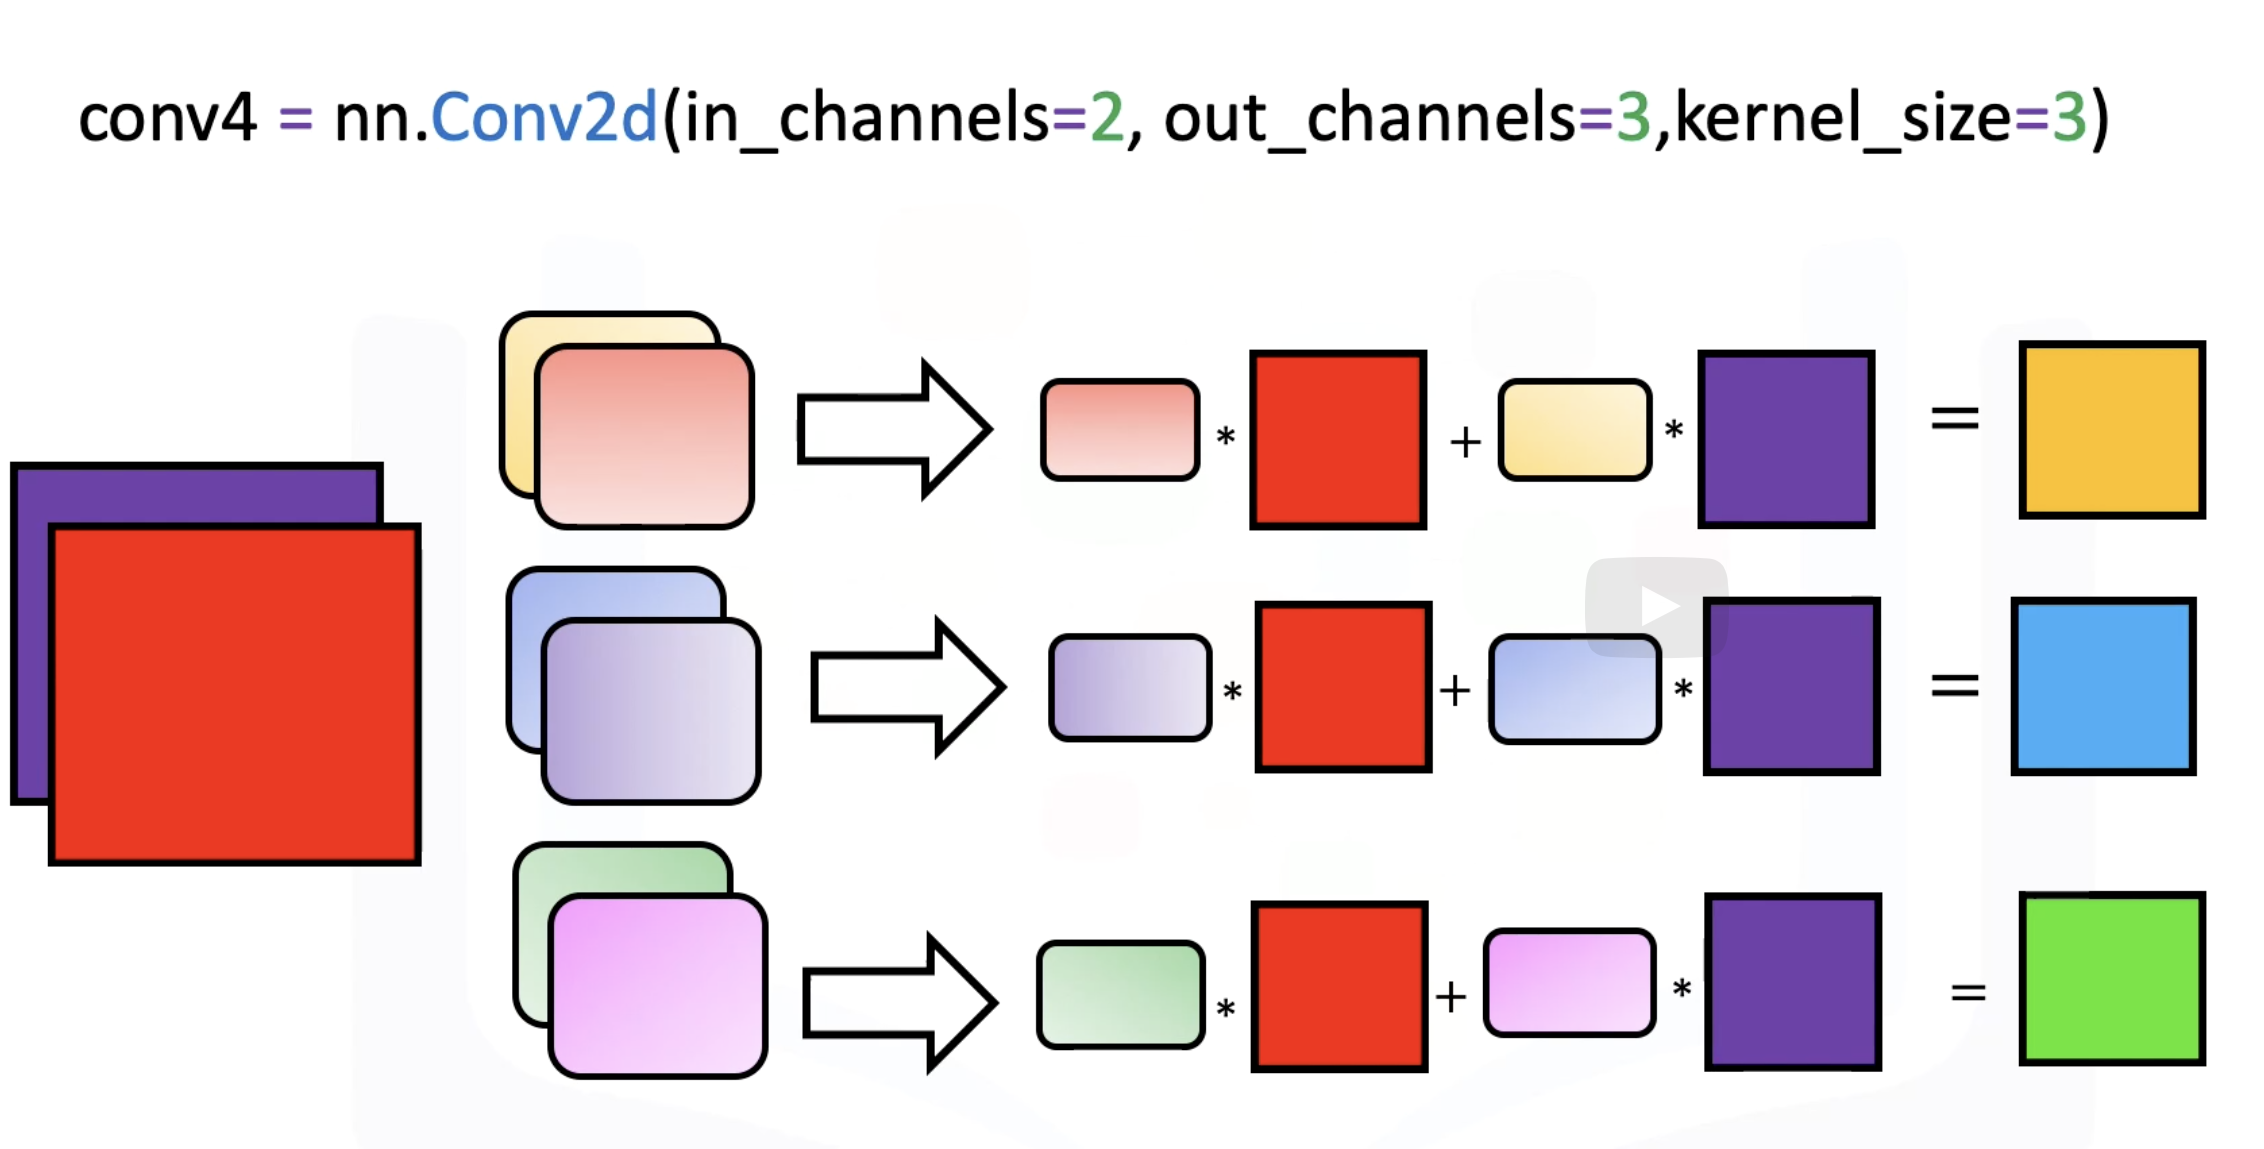

In [53]:
conv4 = nn.Conv2d(in_channels=2, out_channels=3, kernel_size=3)
print(conv4.state_dict())

z = conv4(image3)
print("\nelaborated image:\n", z)

OrderedDict([('weight', tensor([[[[ 0.1645, -0.2177,  0.1184],
          [-0.1488, -0.0968, -0.0154],
          [ 0.0525,  0.0701, -0.0436]],

         [[ 0.1932, -0.2307,  0.0106],
          [ 0.1323,  0.1133, -0.0492],
          [-0.2138, -0.0240, -0.1125]]],


        [[[-0.1532, -0.1695,  0.0027],
          [ 0.0286,  0.1173,  0.0106],
          [ 0.1822,  0.2156,  0.1451]],

         [[-0.1178, -0.1353,  0.0035],
          [-0.0980,  0.1853, -0.1704],
          [ 0.2153,  0.0721, -0.1548]]],


        [[[-0.1363, -0.0662,  0.0843],
          [ 0.1160, -0.1737, -0.0720],
          [-0.0677, -0.1359, -0.1702]],

         [[ 0.0997, -0.0071,  0.0244],
          [-0.0907,  0.0426,  0.0375],
          [ 0.0897, -0.0136,  0.2323]]]])), ('bias', tensor([-0.1140,  0.1338, -0.2007]))])

elaborated image:
 tensor([[[[-0.3853, -0.3853, -0.3853],
          [-0.1787, -0.1787, -0.1787],
          [-0.0757, -0.0757, -0.0757]],

         [[ 0.8092,  0.8092,  0.8092],
          [ 0.2072,  0.2072, 

CNN Constructor

In [54]:
class CNN(nn.Module):
  def __init__(self, out_1=2, out_2=1):
    super(CNN, self).__init__()
    self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=2, padding=0)
    self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=1)
    self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=2, stride=1, padding=0)
    self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=1)
    # add an output linear layer, flattend it will have dimension 49, two output classes
    self.fc1 = nn.Linear(out_2*7*7,2)

  def forward(self, x):
    x = self.cnn1(x)
    x = torch.relu(x)
    x = self.maxpool1(x)
    x = self.cnn2(x)
    x = torch.relu(x)
    x = self.maxpool2(x)
    # flatten the output, n rows and 1 col
    x = x.view(x.size(0),-1)
    x = self.fc1()
